In [21]:
import importlib
import pandas as pd
import numpy as np

import analyze2p.arousal.dlc_utils as dlcutils
import analyze2p.arousal.parse_face_data as pf
import analyze2p.aggregate_datasets as aggr
import analyze2p.utils.helpers as hutils

In [29]:
# Pupil -------------------------------------------
pupil_feature='pupil_fraction'
pupil_epoch='stimulus'
pupil_snapshot=391800
redo_pupil=False
pupil_framerate=20.
eyetracker_dir = '/n/coxfs01/2p-data/eyetracker_tmp'
# -------------------------------------------------
alignment_type='trial'

#### parse_face_data.parse_traces_for_experiment()

In [44]:
# animalid ='JC084'
# session='20190525'
# fov='FOV1_zoom2p0x'

datakey = '20190525_JC084_fov1'
experiment='gratings'
traceid='traces001'
rootdir='/n/coxfs01/2p-data'

In [362]:
importlib.reload(dlcutils)

<module 'analyze2p.arousal.dlc_utils' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/arousal/dlc_utils.py'>

In [363]:
feature_name=pupil_feature
snapshot=391800
iti_pre=1.
iti_post=1.
verbose=False
#### Load pupil data
fovnum = int(fov.split('_')[0][3:])
feature_list = []
if 'pupil' in feature_name:
    feature_list.append('pupil')
trialmeta, pupildata, params = dlcutils.get_pose_data(
                                    datakey, experiment, 
                                    realign=True, recombine=False,
                                    feature_list=feature_list, #[feature_name], 
                                    alignment_type=alignment_type,
                                    iti_pre=iti_pre, iti_post=iti_post,
                                    verbose=verbose, snapshot=snapshot,
                                    eyetracker_dir=eyetracker_dir)

[gratings] Found runs: ['1', '2', '3', '4']
... finding all movies for dset: 20190525_JC084_fov1
----- File 1.-----
... Eyetracker: 20190525_JC084_fov1_gratings_f1_20190525143106359207
... missing 7 frames, added 6
... Full run duration: 14.70 min
----- File 2.-----
... Eyetracker: 20190525_JC084_fov1_gratings_f2_20190525153044945713
... missing 1 frames, added 0
... Full run duration: 14.75 min
----- File 3.-----
... Eyetracker: 20190525_JC084_fov1_gratings_f3_20190525162127582536
... missing 1 frames, added 0
... Full run duration: 15.00 min
----- File 4.-----
... Eyetracker: 20190525_JC084_fov1_gratings_f4_20190525173906136529
... missing 13 frames, added 12
... Full run duration: 17.26 min
... There were 0 missing DLC results.


In [364]:
pupiltraces, missing_trials = dlcutils.traces_to_trials(trialmeta, pupildata, labels,
                    return_missing=True, verbose=False)
        

Splitting traces into trials
... Missing 1 trials total


In [365]:
#### Get labels
labels = aggr.load_frame_labels(datakey, experiment, 
                            traceid=traceid, rootdir=rootdir)
print(labels.head())

      config frame stim_dur       trial      tsec stim_on_frame nframes_on  \
0  config030    49      0.5  trial00001 -1.007724            45         22   
1  config030    50      0.5  trial00001  -0.98533            45         22   
2  config030    51      0.5  trial00001 -0.962936            45         22   
3  config030    52      0.5  trial00001 -0.940542            45         22   
4  config030    53      0.5  trial00001 -0.918148            45         22   

  run_ix file_ix  
0      0       0  
1      0       0  
2      0       0  
3      0       0  
4      0       0  


In [366]:
importlib.reload(dlcutils)

<module 'analyze2p.arousal.dlc_utils' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/arousal/dlc_utils.py'>

In [367]:
print(facemeta.shape, pupildata.shape)
facemeta.head()

(1280, 11) (74018, 5)


,start_ix,end_ix,trial_in_run,run_label,run_num,alignment_type,stim_dur_ms,actual_iti_ms,pre_iti_ms,post_iti_ms,movie
0,39,49,1,1,1,trial,500.0,2000.0,1000.0,1000.0,20190525_JC084_fov1_gratings_f1
1,90,100,2,1,1,trial,500.0,2000.0,1000.0,1000.0,20190525_JC084_fov1_gratings_f1
2,140,150,3,1,1,trial,500.0,2000.0,1000.0,1000.0,20190525_JC084_fov1_gratings_f1
3,191,201,4,1,1,trial,500.0,2000.0,1000.0,1000.0,20190525_JC084_fov1_gratings_f1
4,242,252,5,1,1,trial,500.0,2000.0,1000.0,1000.0,20190525_JC084_fov1_gratings_f1


In [368]:
importlib.reload(pf)

<module 'analyze2p.arousal.parse_face_data' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/arousal/parse_face_data.py'>

In [369]:
# Combines:
# dlcutils.get_pose_data()
# dlcutils.traces_to_trials()
ptraces, params = pf.parse_pose_data(datakey, experiment, 
                                  feature_name=pupil_feature, 
                                  alignment_type=alignment_type,
                                  realign=realign, recombine=recombine)           
                                     
                                  


Parsing pose data.
Splitting traces into trials
... Missing 1 trials total
    saving output to: /n/coxfs01/2p-data/JC084/20190525/FOV1_zoom2p0x/combined_gratings_static/facetracker


In [370]:
# Test loading, output of:  pf.parse_pose_data()
fov_traces, fov_params = dlcutils.load_fov_traces(datakey, experiment,
                                                  alignment_type=alignment_type)


In [257]:
fov_params

{'alignment_type': 'trial',
 'datetime': '20210715 18:13:39',
 'dlc_empty_files': None,
 'dlc_missing_files': [],
 'experiment': 'gratings',
 'iti_post': 1.0,
 'iti_pre': 1.0,
 'missing_trials': [795],
 'raw_src': '/n/coxfs01/2p-data/eyetracker_tmp',
 'snapshot': 391800,
 'stim_dur': 0.5}

In [258]:
in_rate=20.
out_rate=20.
stim_dur = fov_params['stim_dur']

desired_nframes = int((stim_dur + iti_pre + iti_post)*out_rate)
iti_pre_ms=iti_pre*1000

new_stim_on = int(round(iti_pre*out_rate))
nframes_on = int(round(stim_dur*out_rate))
feature_to_load = 'pupil_area'


In [259]:
pupiltraces = fov_traces.copy()
pupiltraces.head()

,pupil_maj,pupil_min,pupil_area,run_label,run_num,config,trial,stim_dur_ms,pre_iti_ms,post_iti_ms,actual_iti_ms
19,5.228245,4.789329,78.664809,1,1,config030,1,500.0,1000.0,1000.0,2000.0
20,5.260439,4.828499,79.796533,1,1,config030,1,500.0,1000.0,1000.0,2000.0
21,5.277987,4.799067,79.574692,1,1,config030,1,500.0,1000.0,1000.0,2000.0
22,5.285391,4.815598,79.960813,1,1,config030,1,500.0,1000.0,1000.0,2000.0
23,5.343534,4.815553,80.839691,1,1,config030,1,500.0,1000.0,1000.0,2000.0


In [260]:
min_nframes = desired_nframes
min_nframes

50

In [261]:
for trial, g in pupiltraces.groupby(['trial']):
    print(len(g))


51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
50
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
50
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
50
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
5

In [262]:
pupiltraces

,pupil_maj,pupil_min,pupil_area,run_label,run_num,config,trial,stim_dur_ms,pre_iti_ms,post_iti_ms,actual_iti_ms
19,5.228245,4.789329,78.664809,1,1,config030,1,500.0,1000.0,1000.0,2000.0
20,5.260439,4.828499,79.796533,1,1,config030,1,500.0,1000.0,1000.0,2000.0
21,5.277987,4.799067,79.574692,1,1,config030,1,500.0,1000.0,1000.0,2000.0
22,5.285391,4.815598,79.960813,1,1,config030,1,500.0,1000.0,1000.0,2000.0
23,5.343534,4.815553,80.839691,1,1,config030,1,500.0,1000.0,1000.0,2000.0
...,...,...,...,...,...,...,...,...,...,...,...
20679,7.500896,6.927045,163.234169,4,4,config027,1280,500.0,1000.0,1000.0,2000.0
20680,7.742641,7.058983,171.704285,4,4,config027,1280,500.0,1000.0,1000.0,2000.0
20681,7.746040,7.059338,171.788300,4,4,config027,1280,500.0,1000.0,1000.0,2000.0
20682,7.752663,7.062153,172.003748,4,4,config027,1280,500.0,1000.0,1000.0,2000.0


False

In [271]:
feature_name = 'pupil_maj'
if len(g) < min_nframes:
    npad = min_nframes - len(g)
    vals = np.pad(g[feature_name].values, pad_width=((0, npad)), mode='edge')
else:
    vals = g[feature_name].values[0:min_nframes]
print(len(vals))

50


In [265]:
import pylab as pl
%matplotlib notebook

<IPython.core.display.Javascript object>


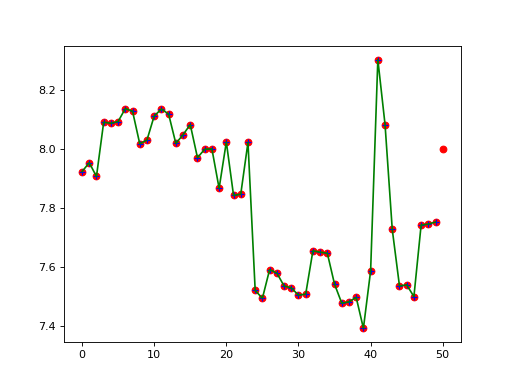

In [274]:
pl.figure()
pl.plot(g[feature_name].values, 'ro')
pl.plot(vals, 'b+')

out_ixs, out_s = dlcutils.resample_traces(vals, in_rate=in_rate, out_rate=out_rate)

pl.plot(out_s, 'g-')

In [278]:
p_=[]
for trial, g in pupiltraces.groupby(['trial']):
    if len(g[feature_name]) < min_nframes:
        npad = min_nframes - len(g[feature_name])
        vals = np.pad(g[feature_name].values, pad_width=((0, npad)), mode='edge')
    else:
        vals = g[feature_name].values[0:min_nframes]
    #print(len(vals))
    out_ixs, out_s = dlcutils.resample_traces(vals, in_rate=in_rate, out_rate=out_rate)
    
    currconfig = g['config'].unique()[0]
    new_stim_on = (iti_pre_ms/1E3)*out_rate 
    pdf = pd.DataFrame({feature_name: out_s})
    
    pdf['stim_on'] = new_stim_on
    pdf['config'] = currconfig
    pdf['trial'] = trial
    p_.append(pdf)


In [304]:
g.shape

(51, 11)

In [281]:
print(trial)
if len(g[feature_name]) < min_nframes:
    npad = min_nframes - len(g[feature_name])
    vals = np.pad(g[feature_name].values, pad_width=((0, npad)), mode='edge')
else:
    vals = g[feature_name].values[0:min_nframes]
#print(len(vals))
out_ixs, out_s = dlcutils.resample_traces(vals, in_rate=in_rate, out_rate=out_rate)

1280


In [319]:
importlib.reload(dlcutils)


<module 'analyze2p.arousal.dlc_utils' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/arousal/dlc_utils.py'>

In [320]:
binned_pupil = binned_pupil = dlcutils.bin_pupil_traces(pupiltraces, #feature_name=feature_name,          
                                        in_rate=in_rate, out_rate=out_rate,  
                                        min_nframes=desired_nframes, iti_pre_ms=iti_pre_ms)


In [321]:
binned_pupil.head()


,pupil_maj,pupil_min,pupil_area,run_label,run_num,trial,stim_dur_ms,pre_iti_ms,post_iti_ms,actual_iti_ms,stim_on,config,frame_ix
0,5.228245,4.789329,78.664809,1.0,1.0,1,500.0,1000.0,1000.0,2000.0,20.0,config030,0
1,5.260439,4.828499,79.796533,1.0,1.0,1,500.0,1000.0,1000.0,2000.0,20.0,config030,1
2,5.277987,4.799067,79.574692,1.0,1.0,1,500.0,1000.0,1000.0,2000.0,20.0,config030,2
3,5.285391,4.815598,79.960813,1.0,1.0,1,500.0,1000.0,1000.0,2000.0,20.0,config030,3
4,5.343534,4.815553,80.839691,1.0,1.0,1,500.0,1000.0,1000.0,2000.0,20.0,config030,4


In [322]:
incl_ixs = np.arange(new_stim_on, new_stim_on+nframes_on).astype(int)

for t, g in binned_pupil.groupby(['trial']):
    g

In [331]:
incl_ixs = np.arange(new_stim_on, new_stim_on+nframes_on).astype(int)
print(len(incl_ixs))

g['frame_ix'].isin(incl_ixs).mean()


10


0.2

In [332]:
incl_ixs

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [353]:
dfs2 = pd.concat([g[g['frame_ix'].isin(incl_ixs)].mean() \
           for t, g in binned_pupil.groupby(['trial'])], axis=1).T
dfs2.head()


,pupil_maj,pupil_min,pupil_area,run_label,run_num,trial,stim_dur_ms,pre_iti_ms,post_iti_ms,actual_iti_ms,stim_on,frame_ix
0,5.024241,4.915799,77.585163,1.0,1.0,1.0,500.0,1000.0,1000.0,2000.0,20.0,24.5
1,8.181423,7.173021,184.362163,1.0,1.0,2.0,500.0,1000.0,1000.0,2000.0,20.0,24.5
2,8.633710,7.402814,200.823032,1.0,1.0,3.0,500.0,1000.0,1000.0,2000.0,20.0,24.5
3,8.345367,7.191403,188.554539,1.0,1.0,4.0,500.0,1000.0,1000.0,2000.0,20.0,24.5
4,7.621890,6.615875,158.466496,1.0,1.0,5.0,500.0,1000.0,1000.0,2000.0,20.0,24.5


In [355]:
np.where(dfs2['pupil_maj']!=pupildf[feature_name].values)

(array([793]),)

In [356]:
dfs2['pupil_maj']

0       5.024241
1       8.181423
2       8.633710
3       8.345367
4       7.621890
          ...   
1274    4.767051
1275    6.257644
1276    7.362364
1277    6.118671
1278    7.699233
Name: pupil_maj, Length: 1279, dtype: float64

In [359]:
dfs2[feature_name].loc[793]

nan

In [358]:
pupildf[feature_name].loc[793]

nan

<IPython.core.display.Javascript object>


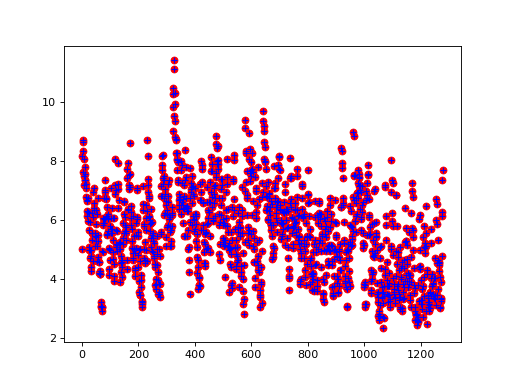

In [354]:
pl.figure()
pl.plot(dfs2['pupil_maj'].values, 'ro')
pl.plot(pupildf[feature_name].values, 'b+') #g_r

In [279]:
pupildfs = pd.concat(p_, axis=0).reset_index(drop=True)

In [280]:
pupildfs

,pupil_maj,stim_on,config,trial
0,5.228245,20.0,config030,1
1,5.260439,20.0,config030,1
2,5.277987,20.0,config030,1
3,5.285391,20.0,config030,1
4,5.343534,20.0,config030,1
...,...,...,...,...
63945,7.540769,20.0,config027,1280
63946,7.500896,20.0,config027,1280
63947,7.742641,20.0,config027,1280
63948,7.746040,20.0,config027,1280


In [338]:
    trials_ = sorted(pupiltraces['trial'].unique())
    frames_ = np.arange(0, desired_nframes)

    pupil_trialmat = pd.DataFrame(np.vstack([p[feature_name].values for trial, p in binned_pupil.groupby(['trial'])]),
                                  index=trials_, columns=frames_)
    pupil_r = pupil_trialmat.T.unstack().reset_index().rename(columns={'level_0': 'trial', 
                                                                       'level_1': 'frame',
                                                                       0: feature_name})
    pupil_r['frame_int'] = [int(round(f)) for f in pupil_r['frame']]
    interp_frame_ixs = list(sorted(pupil_r['frame'].unique()))
    pupil_r['frame_ix'] = [interp_frame_ixs.index(f) for f in pupil_r['frame']]
    pupil_r.shape

(63950, 5)

In [339]:
pupil_r

,trial,frame,pupil_maj,frame_int,frame_ix
0,1,0,5.228245,0,0
1,1,1,5.260439,1,1
2,1,2,5.277987,2,2
3,1,3,5.285391,3,3
4,1,4,5.343534,4,4
...,...,...,...,...,...
63945,1280,45,7.540769,45,45
63946,1280,46,7.500896,46,46
63947,1280,47,7.742641,47,47
63948,1280,48,7.746040,48,48


In [341]:
        pupildf = dlcutils.get_pupil_df(pupil_r, trial_epoch=pupil_epoch, 
                                new_stim_on=new_stim_on, nframes_on=nframes_on)
    

In [342]:
pupildf

,trial,frame,pupil_maj,frame_int,frame_ix
0,1.0,24.5,5.024241,24.5,24.5
1,2.0,24.5,8.181423,24.5,24.5
2,3.0,24.5,8.633710,24.5,24.5
3,4.0,24.5,8.345367,24.5,24.5
4,5.0,24.5,7.621890,24.5,24.5
...,...,...,...,...,...
1274,1276.0,24.5,4.767051,24.5,24.5
1275,1277.0,24.5,6.257644,24.5,24.5
1276,1278.0,24.5,7.362364,24.5,24.5
1277,1279.0,24.5,6.118671,24.5,24.5
